# Predict Stock Price Movement Based On News Headline using NLP
## About the problem and the dataset used.

- The data set in consideration is a combination of the world news and stock price shifts.
- Data ranges from 2008 to 2016 and the data from 2000 to 2008 was scrapped from Yahoo finance.
- There are 25 columns of top news headlines for each day in the data frame.
- Class 1- the stock price increased.
- Class 0- the stock price stayed the same or decreased.

## About the approach.

- Used TF-IDF and Bag of Words for extracting featues from the headlines.
- Used Random Forest Classifier, Multinational Naive Bayes and Passive Aggressive Classifier for analysis.

## Imports

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

In [140]:
df = pd.read_csv('./data/stock_sentiment_analysis.csv', encoding='ISO-8859-1')
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [141]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']
train.shape

(3975, 27)

## Prepare datasets & Feature Engineering

### Removing punctuation

In [142]:
data = train.iloc[:, 2:27]
data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)

In [143]:
test_data = test.iloc[:, 2:27]
test_data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)

### Renaming for easy access

In [144]:
data.columns = [str(i) for i in range(25)]
test_data.columns = [str(i) for i in range(25)]
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,...,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jail,Gone aloft


### Convert headlines to lowercase

In [145]:
for col in data.columns:
    data[col] = data[col].str.lower()
    test_data[col] = test_data[col].str.lower()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader german sleaze inquiry,cheerio boyo,the main recommendations,has cubie killed fees,has cubie killed fees,has cubie killed fees,hopkins furious at foster s lack of hannibal...,has cubie killed fees,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man s extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn t know without the ...,millennium bug fails to bite
2,coventry caught on counter by flo,united s rivals on the road to rio,thatcher issues defence before trial by video,police help smith lay down the law at everton,tale of trautmann bears two more retellings,england on the rack,pakistan retaliate with call for video of walsh,cullinan continues his cape monopoly,mcgrath puts india out of their misery,blair witch bandwagon rolls on,...,south melbourne australia,necaxa mexico,real madrid spain,raja casablanca morocco,corinthians brazil,tony s pet project,al nassr saudi arabia,ideal holmes show,pinochet leaves hospital after tests,useful links
3,pilgrim knows how to progress,thatcher facing ban,mcilroy calls for irish fighting spirit,leicester bin stadium blueprint,united braced for mexican wave,auntie back in fashion even if the dress look...,shoaib appeal goes to the top,hussain hurt by shambles but lays blame on e...,england s decade of disasters,revenge is sweet for jubilant cronje,...,putin admits yeltsin quit to give him a head s...,bbc worst hit as digital tv begins to bite,how much can you pay for,christmas glitches,upending a table chopping a line and scoring ...,scientific evidence unreliable defence claims,fusco wins judicial review in extradition case,rebels thwart russian advance,blair orders shake up of failing nhs,lessons of law s hard heart
4,hitches and horlocks,beckham off but united survive,breast cancer screening,alan parker,guardian readers are you all whingers,hollywood beyond,ashes and diamonds,whingers a formidable minority,alan parker part two,thuggery toxins and ties,...,most everywhere udis,most wanted chloe lunettes,return of the cane completely off the agenda,from sleepy hollow to greeneland,blunkett outlines vision for over s,embattled dobson attacks play now pay later ...,doom and the dome,what is the north south divide,aitken released from jail,gone aloft


In [146]:
headlines = [" ".join(str(x) for x in data.iloc[row, :]) for row in range(0, len(data))]
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

## Implement Bag of Words

In [147]:
from sklearn.feature_extraction.text import CountVectorizer

In [148]:
count_vector = CountVectorizer(ngram_range=(2, 2))
train_dataset = count_vector.fit_transform(headlines)

### Implement RandomForest using Bag of words

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
clf_cv = RandomForestClassifier(n_estimators=200, criterion='entropy')
clf_cv.fit(train_dataset, train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

#### Prediction

In [151]:
test_transform = [" ".join(str(x) for x in test_data.iloc[row, :]) for row in range(0, len(test))]

In [152]:
test_dataset = count_vector.transform(test_transform)
predictions_bg_rf = clf_cv.predict(test_dataset)

#### Check Accuracy

In [153]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Text(0.5, 1.0, 'Confusion Matrix')

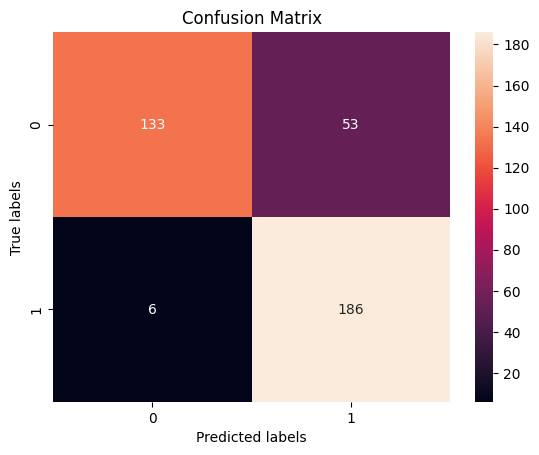

In [154]:
matrix = confusion_matrix(test['Label'], predictions_bg_rf)

ax = plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [155]:
score = accuracy_score(test['Label'], predictions_bg_rf)
score

0.843915343915344

In [156]:
target_names = list("01")
report = classification_report(test['Label'], predictions_bg_rf, target_names=target_names, output_dict=True)

<Axes: >

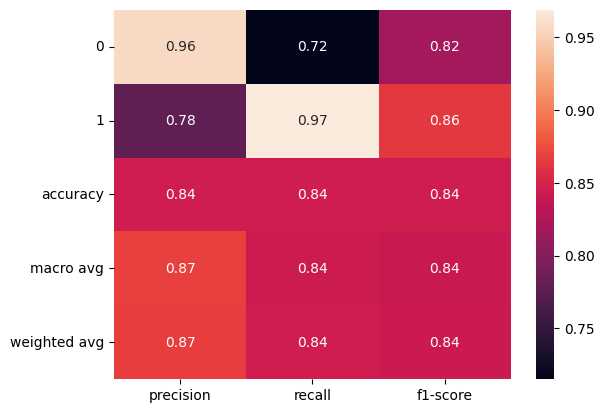

In [157]:
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

### Implement MultinomialNB using Bag of words

In [158]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(train_dataset, train['Label'])

MultinomialNB()

#### Prediction

In [159]:
predictions_bg_na = nb.predict(test_dataset)

#### Check Accuracy

Text(0.5, 1.0, 'Confusion Matrix')

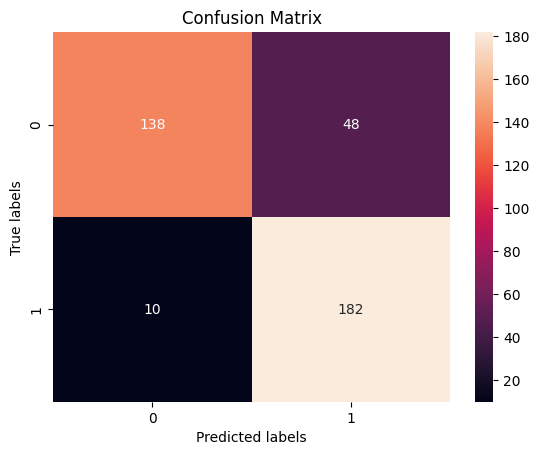

In [160]:
matrix = confusion_matrix(test['Label'], predictions_bg_na)

ax = plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [161]:
score = accuracy_score(test['Label'], predictions_bg_na)
score

0.8465608465608465

In [162]:
target_names = list("01")
report = classification_report(test['Label'], predictions_bg_na, target_names=target_names, output_dict=True)

<Axes: >

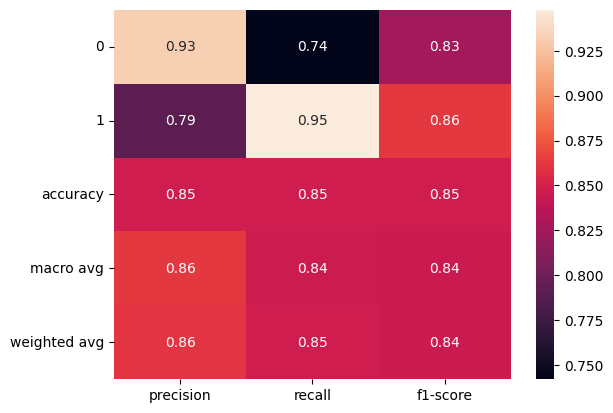

In [163]:
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

### Implement PassiveAggressiveClassifier  using Bag of words

In [164]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa = PassiveAggressiveClassifier()
pa.fit(train_dataset, train['Label'])

PassiveAggressiveClassifier()

#### Prediction

In [165]:
predictions_bg_pa = pa.predict(test_dataset)

#### Check Accuracy

Text(0.5, 1.0, 'Confusion Matrix')

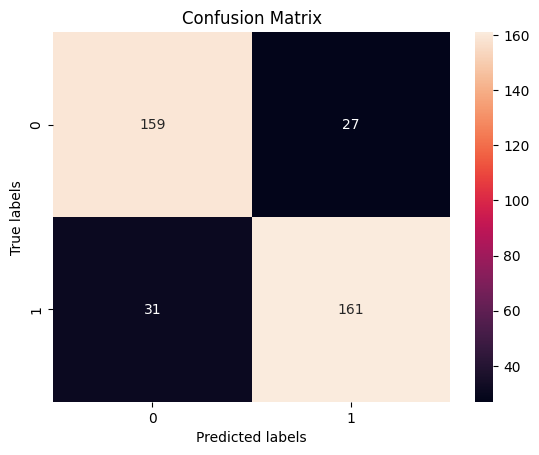

In [166]:
matrix = confusion_matrix(test['Label'], predictions_bg_pa)

ax = plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [167]:
score = accuracy_score(test['Label'], predictions_bg_pa)
score

0.8465608465608465

In [168]:
target_names = list("01")
report = classification_report(test['Label'], predictions_bg_pa, target_names=target_names, output_dict=True)

<Axes: >

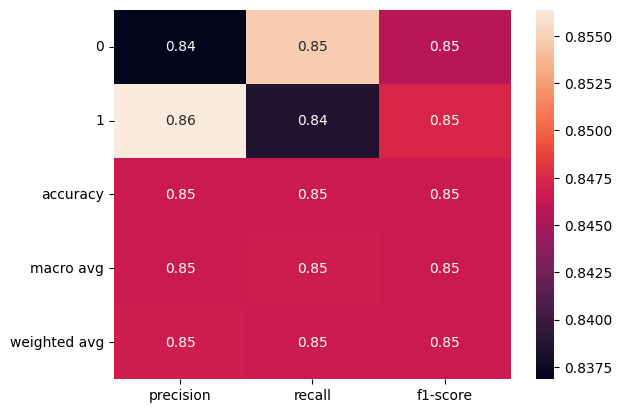

In [169]:
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

## Implement TfidfVectorizer

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [171]:
tfvector = TfidfVectorizer(ngram_range=(2, 3))
train_dataset_tf = tfvector.fit_transform(headlines)

### Implement RandomForest

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
clf_tf = RandomForestClassifier(n_estimators=200, criterion='entropy')
clf_tf.fit(train_dataset_tf, train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

#### Prediction

In [174]:
test_dataset_tf = tfvector.transform(test_transform)
predictions_tf = clf_tf.predict(test_dataset_tf)

#### Check Accuracy

In [175]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Text(0.5, 1.0, 'Confusion Matrix')

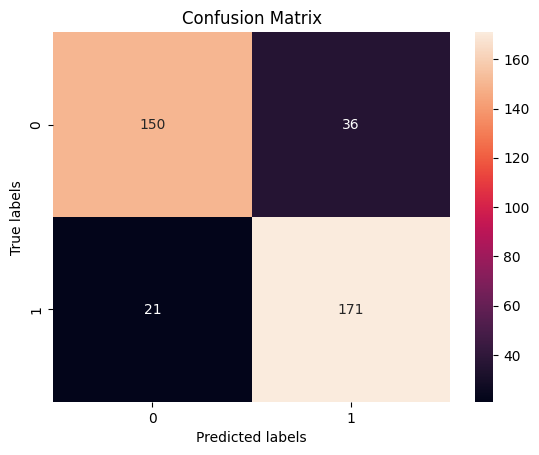

In [176]:
matrix = confusion_matrix(test['Label'], predictions_tf)

ax = plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [177]:
score = accuracy_score(test['Label'], predictions_tf)
score

0.8492063492063492

In [178]:
target_names = list("01")
report = classification_report(test['Label'], predictions_tf, target_names=target_names, output_dict=True)

<Axes: >

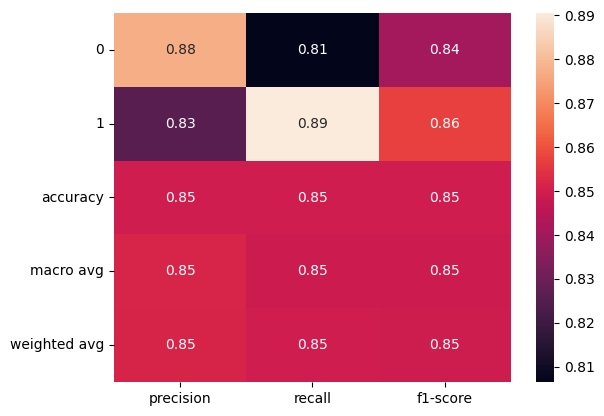

In [179]:
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

### MultinomialNB

In [180]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(train_dataset_tf, train['Label'])

MultinomialNB()

In [181]:
predictions_nb = nb.predict(test_dataset_tf)

Text(0.5, 1.0, 'Confusion Matrix')

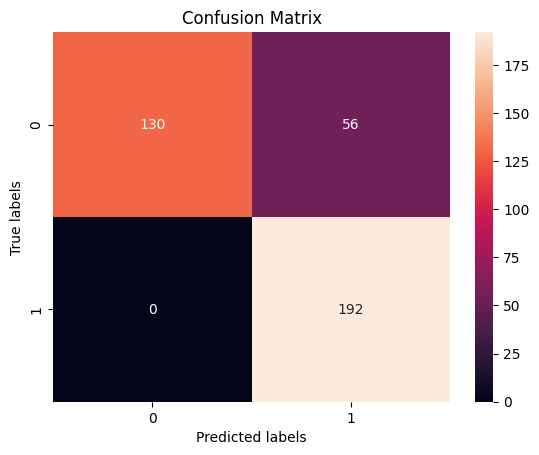

In [182]:
matrix = confusion_matrix(test['Label'], predictions_nb)

ax = plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [183]:
score = accuracy_score(test['Label'], predictions_nb)
score

0.8518518518518519

In [184]:
target_names = list("01")
report = classification_report(test['Label'], predictions_nb, target_names=target_names, output_dict=True)

<Axes: >

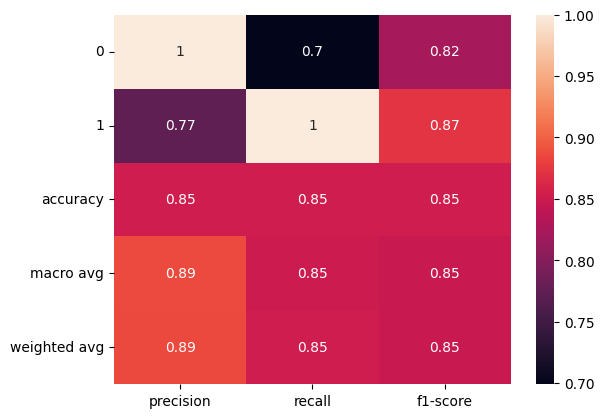

In [185]:
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

### PassiveAggressiveClassifier

In [186]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa = PassiveAggressiveClassifier()
pa.fit(train_dataset_tf, train['Label'])

PassiveAggressiveClassifier()

In [187]:
predictions_pa = pa.predict(test_dataset_tf)

Text(0.5, 1.0, 'Confusion Matrix')

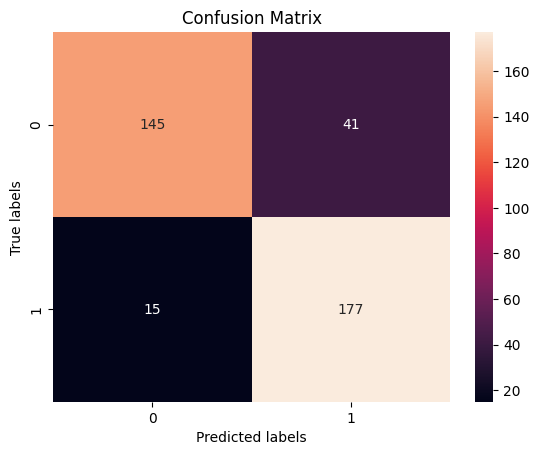

In [188]:
matrix = confusion_matrix(test['Label'], predictions_pa)

ax = plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [189]:
score = accuracy_score(test['Label'], predictions_pa)
score

0.8518518518518519

In [190]:
target_names = list("01")
report = classification_report(test['Label'], predictions_pa, target_names=target_names, output_dict=True)

<Axes: >

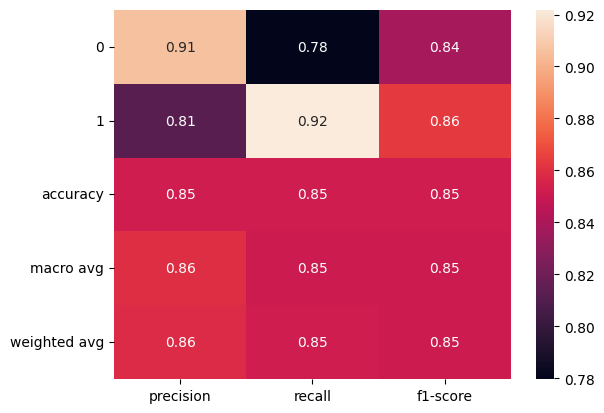

In [191]:
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)